In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
digits = load_digits()

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

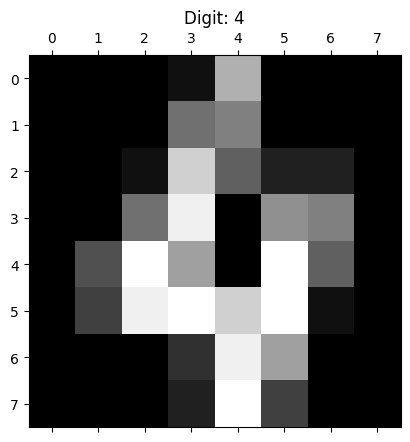

In [ ]:
sample = 4
plt.gray()
plt.matshow(digits.images[sample])
plt.title(f"Digit: {digits.target[sample]}")
plt.show()

In [ ]:
digits.images[sample]

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

In [ ]:
model = LogisticRegression(max_iter=10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [ ]:
y_train

array([4, 2, 4, ..., 0, 5, 5])

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
pred = model.predict(X_test[:10])
print("Predictions: ", pred)
print("Truth:       ", y_test[:10])

Predictions:  [1 0 2 3 0 4 6 4 6 8]
Truth:        [1 0 2 3 0 4 6 4 6 8]


In [ ]:
model.score(X_test, y_test)

0.9644444444444444

In [ ]:
import numpy as np

In [ ]:
# evaluate model accuracy for individual target digits to see what digits the model has more problems with
scores = np.zeros(10)
for dig in range(10):
  scores[dig] = model.score(X_test[y_test==dig], y_test[y_test==dig])
scores

array([0.98039216, 0.95555556, 1.        , 0.89090909, 0.95      ,
       1.        , 1.        , 1.        , 0.89795918, 1.        ])

Text(0.5, 1.0, 'Model Accuracy per Digit')

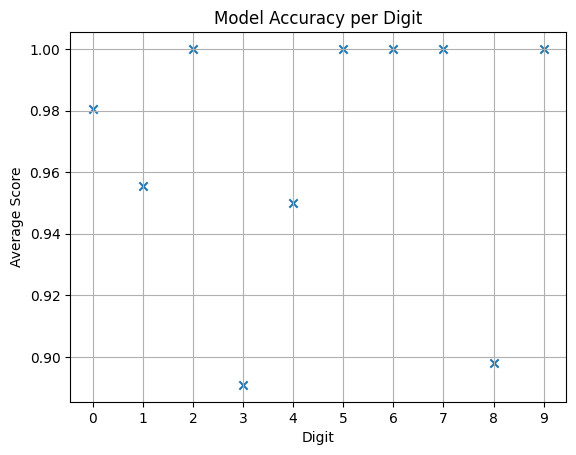

In [ ]:
plt.scatter(np.arange(10), scores, marker='x')
plt.xticks(np.arange(10))
plt.grid()
plt.xlabel("Digit"), plt.ylabel("Average Score")
plt.title("Model Accuracy per Digit")

In [ ]:
X_test[0]

array([ 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,
        0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
       12., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
        0.,  0.,  0.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  7., 12.,
       16., 12., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 11.])

In [ ]:
from PIL import Image

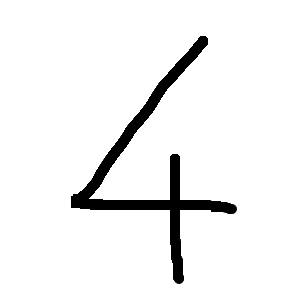

In [ ]:
img = Image.open("image.png")
img

In [ ]:
arr = np.array(img.convert("L").resize((8,8)))
arr= 16*(1-arr.astype('float64')/255)
arr.shape

(8, 8)

In [ ]:
# model expects batch dimension and flattened images
prep_img = np.expand_dims(arr.flatten(), axis=0)
prep_img.shape

(1, 64)

In [ ]:
model.predict(prep_img).item()

4

In [ ]:
model.score(prep_img, np.array([4]))

1.0

In [ ]:
probs = model.predict_proba(prep_img)
probs

array([[2.74072614e-04, 1.87440749e-01, 1.39259548e-04, 7.34907007e-05,
        5.82426215e-01, 3.80045522e-05, 1.46686971e-01, 2.98756960e-04,
        8.26223483e-02, 1.32618975e-07]])

In [ ]:
probs.flatten().argmax().item()

4

In [ ]:
round(probs.flatten().max().item()*100)

58

In [ ]:
X_train.shape

(1347, 64)

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.reshape(digits.data.shape) == digits.data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
digits.images[0].flatten() == digits.data[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
print(model.predict(np.expand_dims(X_test[0], axis=0)))
print(y_test[0])

[1]
1


In [ ]:
np.expand_dims(X_test[0], axis=0).shape

(1, 64)

In [ ]:
X_test[0]

array([ 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,
        0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
       12., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
        0.,  0.,  0.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  7., 12.,
       16., 12., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 11.])

In [ ]:
import pickle

In [ ]:
with open("model_LogReg.pkl", "wb") as f:
    pickle.dump(model, f)

In [39]:
import torch as tc
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt
import numpy as np

In [2]:
nn.Sequential?

In [3]:
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.astype('float64').dtype

dtype('float64')

In [5]:
y_train.dtype

dtype('uint8')

In [6]:
X_train, X_test = X_train.astype('float64'), X_test.astype('float64')

In [7]:
(X_train, y_train), (X_test, y_test) = (tc.tensor(X_train), tc.tensor(y_train)), (tc.tensor(X_test), tc.tensor(y_test))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

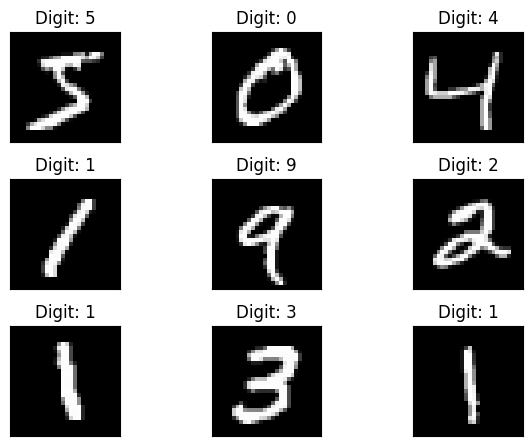

In [8]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(int(y_train[i])))
    plt.xticks([])
    plt.yticks([])

In [9]:
conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=2, padding=1, dtype=tc.float64)
conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2, padding=1, dtype=tc.float64)
pool = nn.MaxPool2d(2,2)
flat = nn.Flatten(start_dim=-3, end_dim=-1)
linear1 = nn.Linear(in_features=32*7*7, out_features=128, dtype=tc.float64)
linear2 = nn.Linear(in_features=128, out_features=10, dtype=tc.float64)

In [10]:
# need to manually add dimension of shape 1 to mimic single grayscale channel
# (isnt by default in mnist set)
X_test.unsqueeze(1).shape

torch.Size([10000, 1, 28, 28])

In [11]:
X_train, X_test = X_train.unsqueeze(1), X_test.unsqueeze(1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([60000, 1, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 1, 28, 28]),
 torch.Size([10000]))

In [12]:
out1 = conv1(X_train[:10])
out1.shape

torch.Size([10, 16, 29, 29])

In [13]:
out_pool1 = pool(out1)
out_pool1.shape

torch.Size([10, 16, 14, 14])

In [14]:
out2 = conv2(out_pool1)
out2.shape

torch.Size([10, 32, 15, 15])

In [15]:
out_pool2 = pool(out2)
out_pool2.shape

torch.Size([10, 32, 7, 7])

In [16]:
out_flat = flat(out_pool2)
out_flat.shape

torch.Size([10, 1568])

In [17]:
32*7*7

1568

In [18]:
out = linear1(out_flat)
out.shape

torch.Size([10, 128])

In [19]:
out = linear2(out)
out.shape

torch.Size([10, 10])

In [20]:
try:
  assert 2 < 1, "Hä?!"
except AssertionError as e:
  print(e.args[0])

Hä?!


In [21]:
model = nn.Sequential(
    conv1,
    nn.ReLU(),
    pool,
    conv2,
    nn.ReLU(),
    pool,
    flat,
    linear1,
    nn.ReLU(),
    linear2
)
# no sofftmax at the end because probabilites are implicitly generated during training in Cross Entropy loss
# add softmax in code when manually predicting on unlabeled input

In [22]:
out = model(X_train[:10])
out.shape

torch.Size([10, 10])

In [23]:
out

tensor([[  1.6135,  -6.3927,   5.7498,   1.5605,   3.6268,   5.9019,   3.0479,
         -12.3075,  -1.9314,   4.4616],
        [ -1.7868,  -7.3728,  11.6010,  -1.3253,   5.9145,   5.2673,   5.6280,
          -7.5154,  -1.6817,   2.4927],
        [  4.2630,   2.3456,   7.9910,   4.7391,  10.0693,  -0.7945,   1.6900,
           1.2660,  -2.0388,   6.7658],
        [  3.9177,   0.6912,   6.1194,   4.3767,   3.2179,   6.8397,  -1.2624,
          -7.1637,  -0.7390,   1.0460],
        [  7.1442,  -0.1852,   2.3500,   1.8113,   6.7151,   3.8536,  -1.6637,
          -6.6661,  -3.1533,  -0.9572],
        [ -1.2815,  -0.4025,   8.6273,  -1.2575,   4.4752,   6.3648,  -0.4314,
         -12.0822,  -5.1898,  -4.1594],
        [  3.2074,  -1.8152,   0.2518,   1.7986,   5.1571,   3.3612,   2.5200,
          -4.9575,  -3.1372,   2.9723],
        [ -0.1448,   1.4565,   7.4948,   2.8262,   4.5455,   3.1559,   4.9392,
         -11.3174,  -3.6116,   5.8619],
        [  1.9184,  -3.5712,  -1.2467,   0.4680,

In [24]:
y_train[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=torch.uint8)

In [25]:
nn.CrossEntropyLoss?

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = tc.optim.Adam(model.parameters(), lr=0.001)
epochs = 10

In [27]:
loss_fn(out, y_train[:10])

tensor(5.1172, dtype=torch.float64, grad_fn=<NllLossBackward0>)

In [28]:
_, argmax = tc.max(out, axis=1) # returns max and argmax automatically
argmax

tensor([5, 2, 4, 5, 0, 2, 4, 2, 5, 4])

In [29]:
(argmax == y_train[:10]).sum().item()

4

In [30]:
len(y_train)

60000

In [31]:
# Decide which device we want to run on
device = tc.device("cuda:0" if (tc.cuda.is_available()) else "cpu")
device

device(type='cuda', index=0)

In [32]:
train_dataloader = DataLoader(TensorDataset(X_train,y_train), batch_size=64, shuffle=True)
test_dataloader = DataLoader(TensorDataset(X_test,y_test), batch_size=1000, shuffle=False)

In [33]:
dl = DataLoader(TensorDataset(X_test,y_test), batch_size=64)

In [34]:
len(dl)

157

In [35]:
X,y = next(iter(dl))
X.shape, y.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [36]:
(y == y_test[:64]).all()

tensor(True)

In [37]:
(X == X_test[:64]).all()

tensor(True)

In [38]:
train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

model = model.to(device)
for epoch in range(epochs):

  print(f"Epoch {epoch+1} / {epochs}\n")

  # ----------- Train Loop ----------------
  model.train()
  train_loss_per_epoch, train_correct = 0, 0
  for batchnumber, (X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)

    logits = model(X)
    loss = loss_fn(logits, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_per_epoch += loss.item()
    _, argmax = tc.max(logits, axis=1) # returns max and argmax automatically
    train_correct += (argmax == y).sum().item()

    # keep track of progress
    if batchnumber % 90 == 0:
      print(f"Current batch {batchnumber+1} / {len(train_dataloader)}")

  train_loss_per_epoch /= len(train_dataloader)
  train_loss.append(train_loss_per_epoch)
  train_acc = train_correct / len(y_train)
  train_accuracy.append(train_acc)

#------------ Test Loop -----------------
  model.eval()
  test_loss_per_epoch, test_correct = 0, 0
  for (X,y) in test_dataloader:
    X,y = X.to(device), y.to(device)

    logits = model(X)
    loss = loss_fn(logits, y)

    test_loss_per_epoch += loss.item()
    _, argmax = tc.max(logits, axis=1) # returns max and argmax automatically
    test_correct += (argmax == y).sum().item()

  test_loss_per_epoch /= len(test_dataloader)
  test_loss.append(test_loss_per_epoch)
  test_acc = test_correct / len(y_test)
  test_accuracy.append(test_acc)




  print("----------------\n")

print("Done!")


Epoch 1 / 10

Current batch 1 / 938
Current batch 91 / 938
Current batch 181 / 938
Current batch 271 / 938
Current batch 361 / 938
Current batch 451 / 938
Current batch 541 / 938
Current batch 631 / 938
Current batch 721 / 938
Current batch 811 / 938
Current batch 901 / 938
----------------

Epoch 2 / 10

Current batch 1 / 938
Current batch 91 / 938
Current batch 181 / 938
Current batch 271 / 938
Current batch 361 / 938
Current batch 451 / 938
Current batch 541 / 938
Current batch 631 / 938
Current batch 721 / 938
Current batch 811 / 938
Current batch 901 / 938
----------------

Epoch 3 / 10

Current batch 1 / 938
Current batch 91 / 938
Current batch 181 / 938
Current batch 271 / 938
Current batch 361 / 938
Current batch 451 / 938
Current batch 541 / 938
Current batch 631 / 938
Current batch 721 / 938
Current batch 811 / 938
Current batch 901 / 938
----------------

Epoch 4 / 10

Current batch 1 / 938
Current batch 91 / 938
Current batch 181 / 938
Current batch 271 / 938
Current batch 

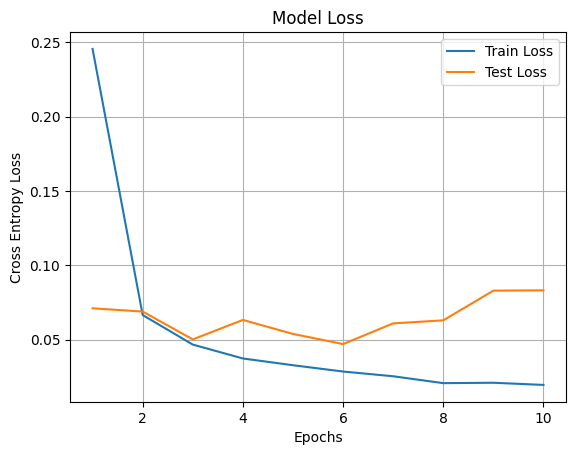

In [42]:
plt.plot(np.arange(1,11), train_loss, label="Train Loss")
plt.plot(np.arange(1,11), test_loss, label="Test Loss")
plt.title("Model Loss")
plt.xlabel("Epochs"), plt.ylabel("Cross Entropy Loss")
plt.grid(), plt.legend()
plt.show()

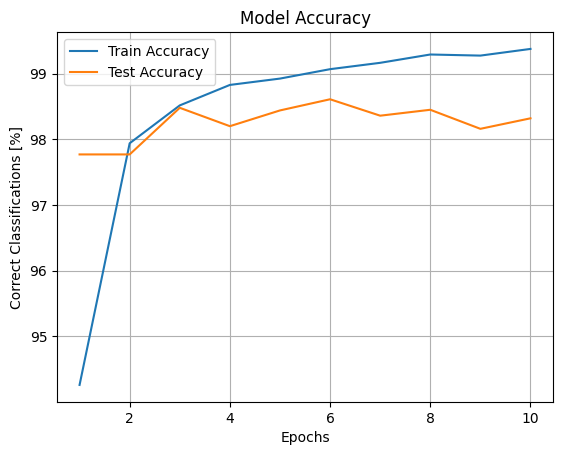

In [44]:
plt.plot(np.arange(1,11), np.array(train_accuracy)*100, label="Train Accuracy")
plt.plot(np.arange(1,11), np.array(test_accuracy)*100, label="Test Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs"), plt.ylabel("Correct Classifications [%]")
plt.grid(), plt.legend()
plt.show()